## Introduction

***

This project will explore *Timeseries anomaly detection using an Autoencoder* via the Keras open-source software library. The project content will be based on the doumcnetation located on the [Keras website](https://keras.io/examples/timeseries/timeseries_anomaly_detection/) with the target of:
- Clearly explainining each keras function used, referring to the documentation.
- Setting the context and describing what the reader can expect as they read down through
the notebook.
- Including a conclusion section where you suggest improvements you
could make to the analysis in the notebook.

## Background
### Time Series Anomoly Detection

Time series data can be thought of as a collection of data points gathered over time intervals. Evaluating this data allows us to trend how something changes over time and potentially helps us understand the underlying causes of the trends. 
<br>

An anomoly in a dataset can be thought of as an outlier where a datapoint differs significantly from the rest. For obvious reasons there is great benifit to identifying outliers in one's data to help identify potential risks. Bhattacharya (2020) helps describe the importance of detecting anomalies by detailing how companies constantly need to evaluate the "new normal" in the data to ultimately drive business decisions. He then details how one can appraoch this problem via Clustering Based Un-supervised algorithms. Before explore the keras variation of this using a artifical neural network (ANN) called an Autoencoder. 

###  Neural Networks  

Neural Networks are comprised of inter-connected layers of artificial neurons called nodes that perform operations on input to potentially yield an optimised output for a given problem **[Koech, 2022]**. Let's have a look at Figure 1 below to help understand how they work.

In the single neruron below we can see the inputs labelled as x<sub>1</sub> and x<sub>2</sub> have weights (w<sub>1</sub>, w<sub>2</sub>) and a Bias (b<sub>k</sub>) applied to them before being passed through an activation function (φ) to yield the output (y<sub>k</sub>). We can summarise the actions of the single neuron below with an equation that describe how the output is the activated weighted sum of the inputs.

<span style="font-size:larger;">y<sub>k</sub> = φ( (w<sub>k1</sub> x<sub>1</sub>    + w<sub>k2</sub> x<sub>2</sub>) + b<sub>k</sub>) </span>

<img src="Images/neural_network_image.png" width="800">
Figure 1. [Saxena, 2020]  

Lets explore the actions of a neural network in more detail before moving on to Autoencoders. The weights in a network determine dictate how important a given feature is in a model, for example a weights close to zero indicates that input little important relative to the predictions. Weights help correlate relationships between features in the data dataset to target values. The idea here is that weights can moderate the association between features to prevent positive association on the summation process if the relationship is not positive, for example if we just sum the input data and the bias without multiplying them by the optimal weights we would result in a scenario where feature relationships are purely associative or dis-associative **[Ganesh (2020)]**. 

As per Ganesh (2020) lets explore a scenario where we have two input features and we want to perform binary classification. Figure 2 below shows two classes of data and the activation function using a neural network with weights (red) and without weights (black). The use of weights allows you to alter the slope of the line to better fit your model, whearas without weights the activation function of x<sub>2</sub> = -x<sub>1</sub>  + b has a constant slope of -1. Note that that altering the bias just moves the activation function to the left or right and many different types of activation functions exist (we will explore this more later).

In [4]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})

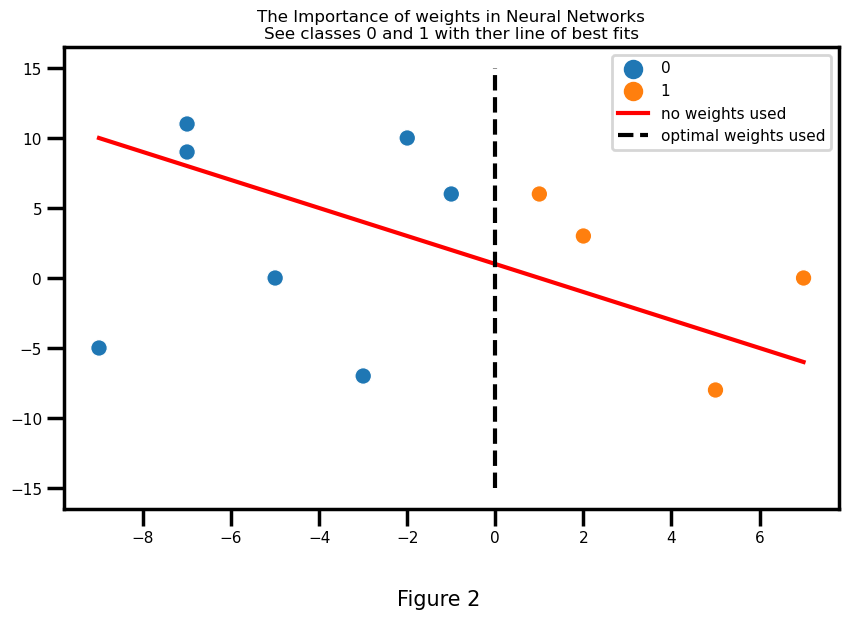

In [9]:
# two input arrays
x1 = np.array([-9,  1, -5, -3,  5, -7, 2, -2, 7, -7, -1])
x2 = np.array([-5,  6,  0, -7, -8, 11, 3, 10, 0, 9, 6])
xclass = [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
bias = 1

# dataframe for plotting
df = pd.DataFrame({'x1':x1, 'x2':x2, 'class':xclass})

# plot code
fig, ax = plt.subplots(figsize = (10, 6))
plt.figtext(0.5, -0.05, 'Figure 2', wrap=True, horizontalalignment='center', fontsize=15);

# plot input arrays
sns.scatterplot(data=df, x=x1, y=x2, hue='class')

# plot x1 and predicted y value using eqn: (x2 = -x1 + bias)
sns.lineplot(data=df, x=x1, y =(-x1 + bias), color='red', label='no weights used')

# plot class boundary (activation function) a neural network could achieve with optimal weights
plt.plot([0, 0], [-15, 15], '--k', label = 'optimal weights used');

# format plot 
ax.title.set_text('The Importance of weights in Neural Networks\n\
See classes 0 and 1 with ther line of best fits')
plt.legend();

### Autoencoders  

An Autoencoder is a type of artifical neural network used to learn data encodings in an unsupervised manner, where the aim is to learn a lower-dimensational representation for higher dimenstional data **[Bandyopadhyay, 2022]**. This statement contains a lot of information, lets parse out the detail.

The ability of an Autoencoder to leverage the un-supervised learning approach allow us to draw insight from unlabelled data which is of great benifit as it can be very costly to label large datasets. The ANN's ability to transform data from higher to lower-dimensional space is very important as it can be very difficuly to interpret higher dimensional data. Think of a model trying to learn with a large number of input variables across 3 dimensions where the the important data needed to effectively train the model only occupies localised regions of the space. With such a scenario it could be computationally heavy to extract the relevant information from the space and could potentially lead to overfitting as more features are fed into the model, i.e: the model finds the best solution that may not be representative of the real world problem


<img src="Images/autoencoder.png" width="700">
Figure 3. [[Bandyopadhyay, 2022]  


<h2>References:</h2>

<br> 

[1]. Bhattacharya, A, 2020, Effective Approaches for Time Series Anomaly Detection, Towards Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/effective-approaches-for-time-series-anomaly-detection-9485b40077f1) (Viewed 21 December 2022).

<br>

[2]. Bandyopadhyay, H, 2022, Autoencoders in Deep Learning: Tutorial & Use Cases, V7labs, available at:<br>
[Ref Link](https://www.v7labs.com/blog/autoencoders-guide) (Viewed 21 December 2022).

<br>

[3].Koech, K, 2022, The Basics of Neural Networks (Neural Network Series) — Part 1, Towards Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/the-basics-of-neural-networks-neural-network-series-part-1-4419e343b2b) (Viewed 22 December 2022).

<br>


[4] Saxena, A, 2020, Building a Simple Neural Network from Scratch, Towards Data Science, available at:<br>[Ref Link](https://miro.medium.com/max/640/1*UWJ52M5qNZp-38j11STT5g.webp) (Viewed 22 December 2022). ******* Figure 1*******

<br>

[5]. Ganesh, S, 2020, What’s The Role Of Weights And Bias In a Neural Network?, Towards Data Science, available at:<br>
[Ref Link](https://towardsdatascience.com/whats-the-role-of-weights-and-bias-in-a-neural-network-4cf7e9888a0f) (Viewed X December 2022).

<br>

[6]. x, y, 202-, ..., ..., available at:<br>
[Ref Link](link here) (Viewed X December 2022).


<br>

[7]. x, y, 202-, ..., ..., available at:<br>
[Ref Link](link here) (Viewed X December 2022).

<br>

[8]. x, y, 202-, ..., ..., available at:<br>
[Ref Link](link here) (Viewed X December 2022).

<br>


[9]. x, y, 202-, ..., ..., available at:<br>
[Ref Link](link here) (Viewed X December 2022).

<br>


[10]. x, y, 202-, ..., ..., available at:<br>
[Ref Link](link here) (Viewed X December 2022).

<br>

# Evaluation

***

https://keras.io/examples/timeseries/timeseries_anomaly_detection/

In [2]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

# Plotting
import matplotlib.pyplot as plt

## Data

***

https://www.kaggle.com/datasets/boltzmannbrain/nab

https://github.com/numenta/NAB

In [ ]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

In [ ]:
no_anomaly_url

In [ ]:
with_anomaly_url

In [ ]:
# 
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [ ]:
# 
df_small_noise.head()

In [ ]:
# 
df_small_noise.describe()

In [ ]:
# 
df_small_noise.iloc[0]

In [ ]:
# 
df_small_noise.iloc[0]['value']

In [ ]:
# 
df_small_noise.iloc[0].values[0]

In [ ]:
# 
df_small_noise.iloc[0].values[0] * 10e12

In [ ]:
# 
df_small_noise.shape

In [ ]:
# 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax);

In [ ]:
#
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [ ]:
# 
df_daily_jumpsup.head()

In [ ]:
# 
df_daily_jumpsup.describe()

In [ ]:
# 
df_daily_jumpsup.iloc[0]['value']

In [ ]:
# 
df_daily_jumpsup.shape

In [ ]:
# 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

## Preprocessing

***

In [ ]:
# 
train_mean = df_small_noise.mean()

train_mean

In [ ]:
# 
train_std = df_small_noise.std()

train_std

In [ ]:
# 
df_train_vals = (df_small_noise - train_mean) / train_std

In [ ]:
# 
df_train_vals.head()

In [ ]:
# 
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

In [ ]:
df_small_noise

In [ ]:
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

In [ ]:
df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

In [ ]:
# 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

In [ ]:
# 
df_train_vals.shape

In [ ]:
# 
window_size = 288

Window example:

```python
[1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
window_size = 3
[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
...
```

In [ ]:
# Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
# Example window size.
win_size = 3
# Length of L.
len(L)

In [ ]:
# Number of windows from L.
len(L) - (win_size - 1)

In [ ]:
# Remove brackets.
len(L) - win_size + 1

In [ ]:
# Print the windows.
for i in range(len(L) - win_size + 1):
    print(L[i:i + win_size])

In [ ]:
# For accumulating the windows.
wins = []

# Generate the windows
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

wins

In [ ]:
# Create a 2D numpy array from wins.
np.stack(wins)

In [ ]:
# 
def windows(vals, N=window_size):
  # 
  L = []
  # 
  for i in range(len(vals) - N + 1):
    # 
    L.append(vals[i:i+N])
  # Stack
  return np.stack(L)

In [ ]:
# 
x_train = windows(df_train_vals)

In [ ]:
# 
x_train[0][0], x_train[-1][-1]

In [ ]:
# 
df_train_vals.iloc[0], df_train_vals.iloc[-1]

In [ ]:
# 
x_train.shape

In [ ]:
#
df_train_vals['value'].values

In [ ]:
# 
x_train[0].flatten()

In [ ]:
# 
window_no = 200

# 
fig, ax = plt.subplots(figsize=(12, 6))

# 
y = df_train_vals['value'].values

# 
ax.plot(np.arange(y.shape[0]), y, label='signal')

# The first window.
w = x_train[window_no].flatten()

# 
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

ax.legend();

## Neural Network

***

In [ ]:
x_train.shape

In [ ]:
#
layers = [
  #
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  #
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

In [ ]:
#
model = keras.Sequential(layers)

In [ ]:
# 
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
# 
model.compile(optimizer=optimizer, loss="mse")

In [ ]:
model.summary()

In [ ]:
# 
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

## Evaluation

***

In [ ]:
history.history["loss"]

In [ ]:
history.history["val_loss"]

In [ ]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.plot(history.history["loss"], label="Training Loss")
# 
ax.plot(history.history["val_loss"], label="Validation Loss")
# 
ax.legend();

In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)

In [ ]:
# Calculate loss...
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

In [ ]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.hist(train_mae_loss, bins=50)
# 
ax.set_xlabel("Train MAE loss")
#
ax.set_ylabel("No of samples");

In [ ]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# 
threshold

In [ ]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
ax.plot(x_train[0])

# 
ax.plot(x_train_pred[0]);

In [ ]:
# 
df_test_value = (df_daily_jumpsup - train_mean) / train_std

In [ ]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_test_value.plot(legend=False, ax=ax);

In [ ]:
# Create sequences from test values.
x_test = windows(df_test_value.values)

x_test.shape

In [ ]:
# 
x_test_pred = model.predict(x_test)

In [ ]:
# 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss

In [ ]:
# 
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss

In [ ]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

#
ax.hist(test_mae_loss, bins=50)

# 
ax.set_xlabel("test MAE loss")

# 
ax.set_ylabel("No of samples");

In [ ]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# NUmber of anomalies.
np.sum(anomalies)

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

In [ ]:
# 
df_subset = df_daily_jumpsup.iloc[inds]

In [ ]:
#
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_daily_jumpsup.plot(legend=False, ax=ax)

# 
df_subset.plot(legend=False, ax=ax, color="r");

***

## End